In [ ]:
pip install transformers

In [ ]:
pip install scipy

In [4]:
import math
import pandas as pd

In [ ]:
pip install pytorch-transformers

In [108]:
df=pd.read_csv("/content/data11.csv")
data=df['Tweet']

In [90]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']
a=0
b=0
c=0
aa=0
bb=0
cc=0
cnt1=0
cnt2=0
cnt3=0
# sentiment analysis
for x in range(len(data)):
  encoded_tweet = tokenizer(data[x], return_tensors='pt')
  #output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
  output = model(**encoded_tweet)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores) 
  a=scores[0]
  b=scores[1]
  c=scores[2]
  aa=scores[0]
  bb=scores[1]
  cc=scores[2]
  if(a>b and a>c):
    cnt1+=1
  elif(b>a and b>c):
    cnt2+=1
  else:
    cnt3+=1 
  aa+=scores[0]
  bb+=scores[1]
  cc+=scores[2]
aa=aa/len(data)
bb=bb/len(data)
cc=cc/len(data)
l = labels[0]
print(l,a)
l = labels[1]
print(l,b)
l = labels[2]
print(l,c)
l = labels[0]
print(l,cnt1,"votes")
l = labels[1]
print(l,cnt2,"votes")
l = labels[2]
print(l,cnt3,"votes")


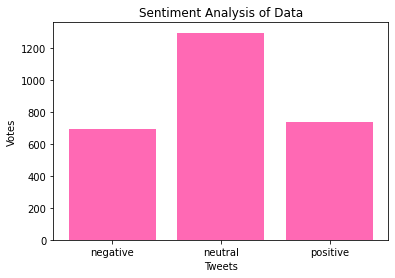

In [94]:
x = np.array(["negative","neutral","positive"])
y = np.array([cnt1,cnt2,cnt3])
plt.bar(x, y, color = "hotpink")
plt.title("Sentiment Analysis of Data")
plt.xlabel("Tweets")
plt.ylabel("Votes")
plt.show()

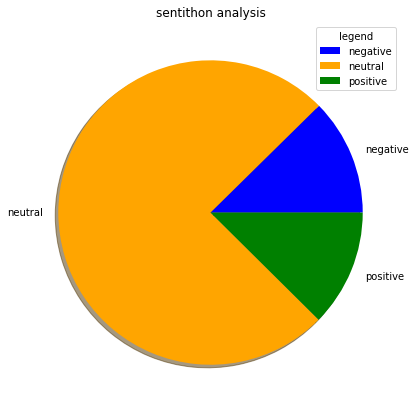

In [100]:
from matplotlib import pyplot as plt
import numpy as np
p = ['negative', 'neutral', 'positive']
neg=aa*1000000
neu=bb*1000000
pos=cc*1000000
data = [neg,neu,pos]
 
# Creating plot
mycolors = ["blue", "orange", "green"]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = p,shadow = True,colors=mycolors)
plt.legend(title="legend")
plt.title("sentithon analysis")
# show plot
plt.show()